# Deep Neural Network (DNN)

Training DNN Model...
Epoch 0/100, Loss: 1.1292
Epoch 10/100, Loss: 0.9604
Epoch 20/100, Loss: 0.8968
Epoch 30/100, Loss: 0.8540
Epoch 40/100, Loss: 0.8363
Epoch 50/100, Loss: 0.8210
Epoch 60/100, Loss: 0.8052
Epoch 70/100, Loss: 0.7904
Epoch 80/100, Loss: 0.7772
Epoch 90/100, Loss: 0.7655
Plotting decision boundary for DNN...


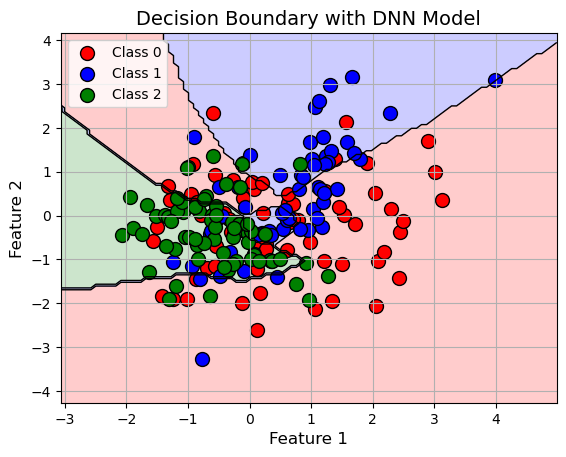

In [2]:
# Import necessary libraries
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a more complex dataset with 3 classes
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=3,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.5,
    flip_y=0.1,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the DNN Model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model
input_size = 2
hidden_size = 16
output_size = 3  # 3 classes

dnn_model = DNN(input_size, hidden_size, output_size)

# Choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
dnn_optimizer = optim.Adam(dnn_model.parameters(), lr=0.01)

# Train the DNN Model
def train_model(model, optimizer, X_train_tensor, y_train_tensor, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

# Train DNN model
print("Training DNN Model...")
train_model(dnn_model, dnn_optimizer, X_train_tensor, y_train_tensor)

# Visualizing the decision boundary
def plot_decision_boundary(X, y, model, num_classes):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    model.eval()
    with torch.no_grad():
        Z = model(grid)
        Z = torch.argmax(Z, axis=1).numpy()
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, colors=['red', 'blue', 'green'], levels=np.arange(-0.5, 3, 1))
    plt.contour(xx, yy, Z, levels=np.arange(-0.5, 3, 1), colors='black', linewidths=1)

    colors = ['red', 'blue', 'green']
    for i in range(num_classes):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f"Class {i}", edgecolor='k', s=100)
    
    plt.title("Decision Boundary with DNN Model", fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot decision boundaries for DNN model
print("Plotting decision boundary for DNN...")
plot_decision_boundary(X, y, dnn_model, num_classes=3)
